In [0]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np
import matplotlib.pyplot as plt



In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , tests_labels) = fashion_mnist.load_data()

print(type(train_labels))
print(type(train_images))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
class_names = ['T-shirt/top' , 'Trouser' , 'Pullvoler' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']



In [4]:
train_images.shape

(60000, 28, 28)

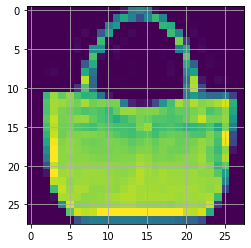

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [0]:
train_images = train_images/ 255.0
test_images = test_images/255.0

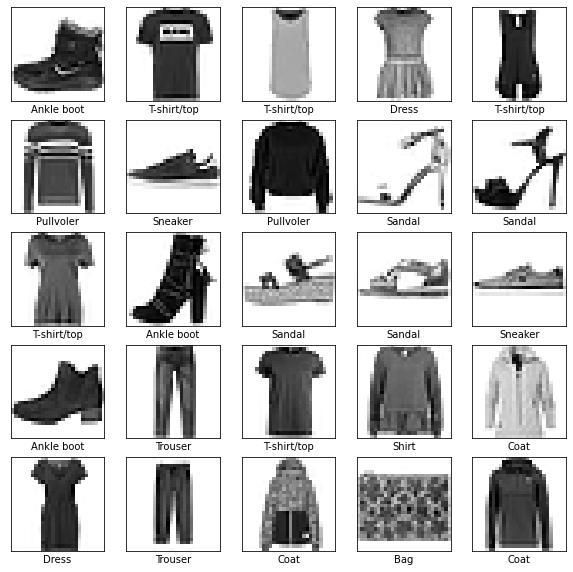

In [7]:
%matplotlib inline


plt.figure(figsize= (10,10))

for i in range(25):

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i] , cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)) , keras.layers.Dense(128 , activation= tf.nn.relu) ,
                          keras.layers.Dense(10 , activation= tf.nn.softmax)])

In [0]:
model.compile( loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )


In [10]:
model.fit(train_images , train_labels , epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3446 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8874


In [11]:
test_loss , tests_acc = model.evaluate(test_images , tests_labels)

# print('Accuracy' , tests_acc) # recordamos que el accuracy es que tan bien predijo el modelo 

313/313 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8678


In [12]:
prediction = model.predict(test_images)
prediction.shape


(10000, 10)

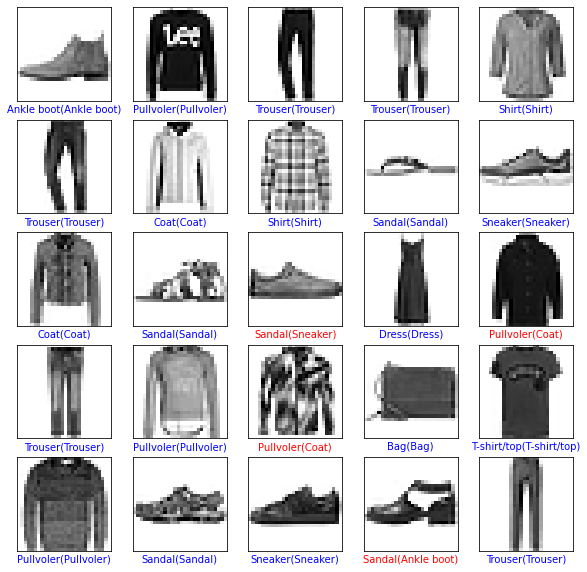

In [13]:
plt.figure(figsize= (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i] , cmap = plt.cm.binary)
  predicted_label = np.argmax(prediction[i])
  true_label = tests_labels[i]
  if true_label == predicted_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{}({})'.format(class_names[predicted_label] , class_names[true_label]) , color = color)

